In [64]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
#import matplotlib.cm as cm
from matplotlib.colors import ListedColormap


import warnings 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, normalize

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering


from sklearn.decomposition import PCA

from sklearn.metrics import silhouette_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

K-Means

In [65]:
df=pd.read_csv('Iris.csv')

In [71]:
df.head(55)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [70]:
df.Species.unique

<bound method Series.unique of 0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object>

In [30]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [31]:
df.drop('Id', axis=1, inplace=True)

In [32]:
df.drop('Species', axis=1, inplace=True)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SepalLengthCm', ylabel='count'>

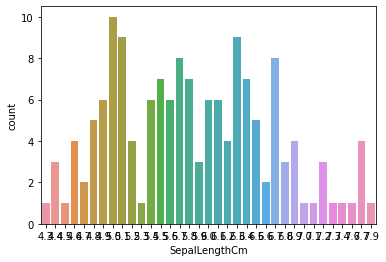

In [34]:
sns.countplot('SepalLengthCm',data=df)

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SepalWidthCm', ylabel='count'>

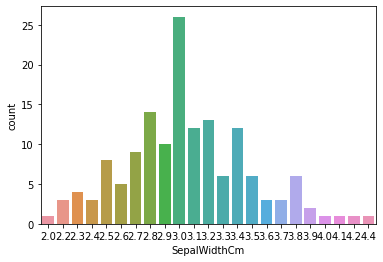

In [35]:
sns.countplot('SepalWidthCm',data=df)

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PetalLengthCm', ylabel='count'>

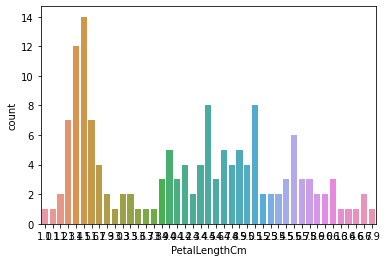

In [36]:
sns.countplot('PetalLengthCm',data=df)

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PetalWidthCm', ylabel='count'>

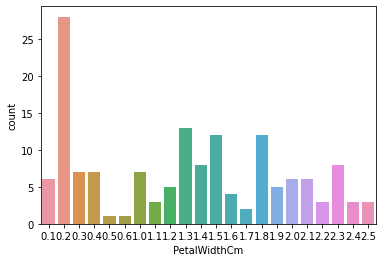

In [37]:
sns.countplot('PetalWidthCm',data=df)

In [47]:
X = df.iloc[:, [2, 0]].values
X

array([[1.4, 5.1],
       [1.4, 4.9],
       [1.3, 4.7],
       [1.5, 4.6],
       [1.4, 5. ],
       [1.7, 5.4],
       [1.4, 4.6],
       [1.5, 5. ],
       [1.4, 4.4],
       [1.5, 4.9],
       [1.5, 5.4],
       [1.6, 4.8],
       [1.4, 4.8],
       [1.1, 4.3],
       [1.2, 5.8],
       [1.5, 5.7],
       [1.3, 5.4],
       [1.4, 5.1],
       [1.7, 5.7],
       [1.5, 5.1],
       [1.7, 5.4],
       [1.5, 5.1],
       [1. , 4.6],
       [1.7, 5.1],
       [1.9, 4.8],
       [1.6, 5. ],
       [1.6, 5. ],
       [1.5, 5.2],
       [1.4, 5.2],
       [1.6, 4.7],
       [1.6, 4.8],
       [1.5, 5.4],
       [1.5, 5.2],
       [1.4, 5.5],
       [1.5, 4.9],
       [1.2, 5. ],
       [1.3, 5.5],
       [1.5, 4.9],
       [1.3, 4.4],
       [1.5, 5.1],
       [1.3, 5. ],
       [1.3, 4.5],
       [1.3, 4.4],
       [1.6, 5. ],
       [1.9, 5.1],
       [1.4, 4.8],
       [1.6, 5.1],
       [1.4, 4.6],
       [1.5, 5.3],
       [1.4, 5. ],
       [4.7, 7. ],
       [4.5, 6.4],
       [4.9,

In [48]:
fig = plt.figure(figsize =(10,5))

<Figure size 720x360 with 0 Axes>

No handles with labels found to put in legend.


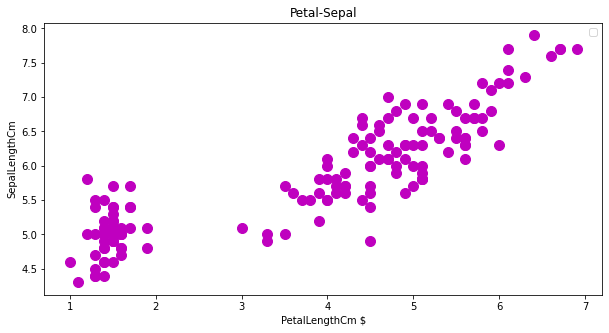

In [49]:
fig = plt.figure(figsize = (10,5))
plt.scatter(X[:,0],X[:,1],s=100,c='m',label='')
plt.title('Petal-Sepal')
plt.xlabel('PetalLengthCm $')
plt.ylabel('SepalLengthCm')
plt.legend()
plt.show()

C:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


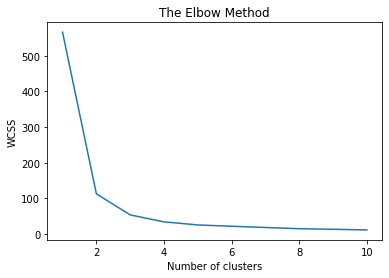

In [50]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
    
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [58]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.7096825580780911
For n_clusters = 3 The average silhouette_score is : 0.5890612473845503
For n_clusters = 4 The average silhouette_score is : 0.5645625259805054
For n_clusters = 5 The average silhouette_score is : 0.5577964978354597
For n_clusters = 6 The average silhouette_score is : 0.41167421221860645
For n_clusters = 7 The average silhouette_score is : 0.406901212423912
For n_clusters = 8 The average silhouette_score is : 0.4136829453787558
For n_clusters = 9 The average silhouette_score is : 0.4188136743385756
For n_clusters = 10 The average silhouette_score is : 0.4301094058239432


In [59]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [60]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [61]:
kmeans.cluster_centers_

array([[4.97395833, 6.31458333],
       [1.59814815, 5.00555556]])

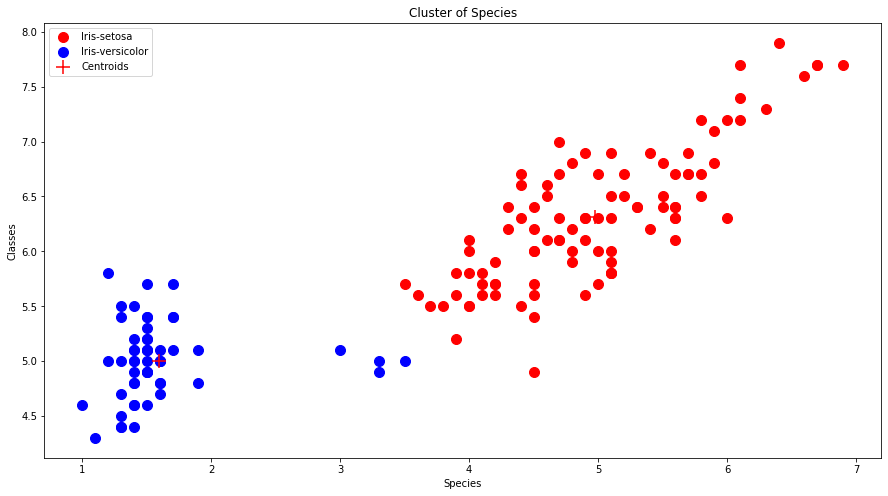

In [80]:
fig = plt.figure(figsize = (15,8))
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=100,c='red',label='Iris-setosa')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=100,c='blue',label='Iris-versicolor')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=200,c='red',label='Centroids',marker = "+")
plt.title('Cluster of Species')
plt.xlabel('Species')
plt.ylabel('Classes')
plt.legend()
plt.show()

Hierarchical

In [81]:
X

array([[1.4, 5.1],
       [1.4, 4.9],
       [1.3, 4.7],
       [1.5, 4.6],
       [1.4, 5. ],
       [1.7, 5.4],
       [1.4, 4.6],
       [1.5, 5. ],
       [1.4, 4.4],
       [1.5, 4.9],
       [1.5, 5.4],
       [1.6, 4.8],
       [1.4, 4.8],
       [1.1, 4.3],
       [1.2, 5.8],
       [1.5, 5.7],
       [1.3, 5.4],
       [1.4, 5.1],
       [1.7, 5.7],
       [1.5, 5.1],
       [1.7, 5.4],
       [1.5, 5.1],
       [1. , 4.6],
       [1.7, 5.1],
       [1.9, 4.8],
       [1.6, 5. ],
       [1.6, 5. ],
       [1.5, 5.2],
       [1.4, 5.2],
       [1.6, 4.7],
       [1.6, 4.8],
       [1.5, 5.4],
       [1.5, 5.2],
       [1.4, 5.5],
       [1.5, 4.9],
       [1.2, 5. ],
       [1.3, 5.5],
       [1.5, 4.9],
       [1.3, 4.4],
       [1.5, 5.1],
       [1.3, 5. ],
       [1.3, 4.5],
       [1.3, 4.4],
       [1.6, 5. ],
       [1.9, 5.1],
       [1.4, 4.8],
       [1.6, 5.1],
       [1.4, 4.6],
       [1.5, 5.3],
       [1.4, 5. ],
       [4.7, 7. ],
       [4.5, 6.4],
       [4.9,

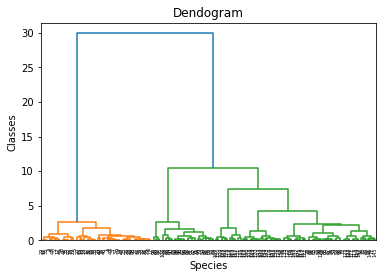

In [82]:
dendogram=sch.dendrogram(sch.linkage(X,method='ward'))
plt.title('Dendogram')
plt.xlabel('Species')
plt.ylabel('Classes')
plt.show()

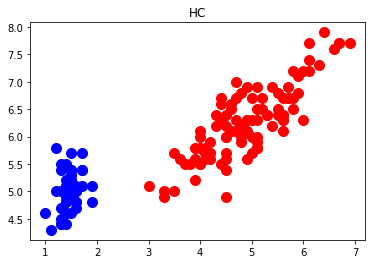

In [83]:
ac = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
hc_predict = ac.fit_predict(X)
plt.scatter(X[hc_predict==0,0],X[hc_predict==0,1],s=100, c='red')
plt.scatter(X[hc_predict==1,0],X[hc_predict==1,1],s=100, c='blue')
plt.title('HC')
plt.show()